# 2) Salary_hike -> Build a prediction model for Salary_hike

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [18]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# import dataset
from google.colab import files
uploaded=files.upload()

Saving Salary_Data.csv to Salary_Data (1).csv


In [20]:
# read dataset
data=pd.read_csv("Salary_Data.csv")
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# EDA and Data visualization

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


<ipython-input-5-9990faf39d12>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

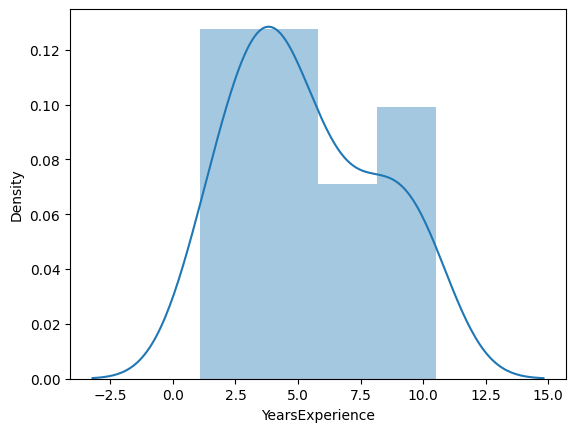

In [5]:
import seaborn as sns
sns.distplot(data['YearsExperience'])

<ipython-input-6-e48280bca5d4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Salary"])


<Axes: xlabel='Salary', ylabel='Density'>

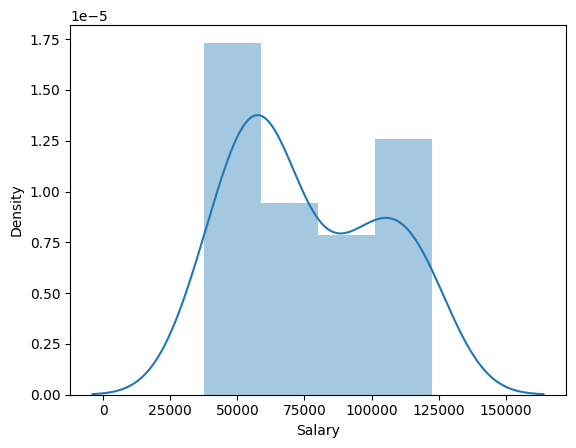

In [6]:
import seaborn as sns
sns.distplot(data["Salary"])

# Correlation

In [7]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


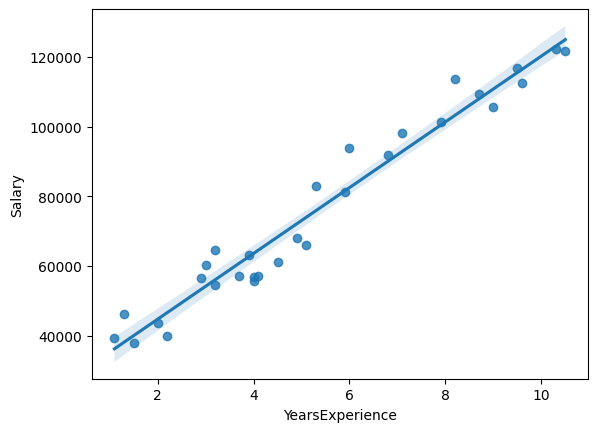

In [8]:
sns.regplot(x = "YearsExperience", y = "Salary" , data=data);

# Transformation(log)

In [9]:
data[['Salary','YearsExperience']]=np.log(data[['Salary','YearsExperience']])
data[['Salary','YearsExperience']]

,Salary,YearsExperience
0,10.580073,0.095310
1,10.740843,0.262364
2,10.538237,0.405465
3,10.681091,0.693147
4,10.593906,0.788457
5,10.944506,1.064711
6,11.004597,1.098612
7,10.904946,1.163151
8,11.073567,1.163151
9,10.954117,1.308333


# Fitting a Simple Linear Regression Model

# model building

In [10]:
import statsmodels.formula.api as smf
model = smf.ols("Salary~YearsExperience",data=data).fit()

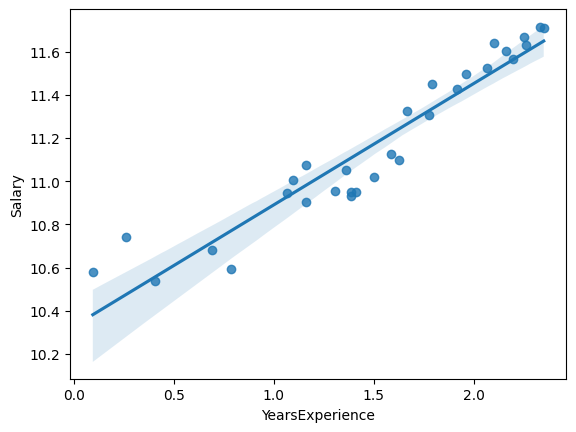

In [11]:
sns.regplot(x = "YearsExperience", y = "Salary" , data=data);

# model testing

In [12]:
# coefficient parameters
model.params

Intercept          10.328043
YearsExperience     0.562089
dtype: float64

In [13]:
# Rsquared and adjusted_Rsquared values
model.rsquared,model.rsquared_adj

(0.905215072581715, 0.9018298966024905)

# model predictions

In [14]:
#Predict for 4 and 8 years experiance
newdata=pd.Series([4,8])

In [15]:
data_pred=pd.DataFrame(newdata,columns=["YearsExperience"])

In [16]:
data_pred

,YearsExperience
0,4
1,8


In [17]:
model.predict(data_pred)

0    12.576399
1    14.824754
dtype: float64

# Transformation(square root)

In [22]:
data[['Salary','YearsExperience']]=np.sqrt(data[['Salary','YearsExperience']])
data[['Salary','YearsExperience']]

,Salary,YearsExperience
0,198.350700,1.048809
1,214.953483,1.140175
2,194.244691,1.224745
3,208.626460,1.414214
4,199.727314,1.483240
5,237.995798,1.702939
6,245.254969,1.732051
7,233.334524,1.788854
8,253.860198,1.788854
9,239.142217,1.923538


# model building

In [23]:
import statsmodels.formula.api as smf
model = smf.ols("Salary~YearsExperience",data=data).fit()

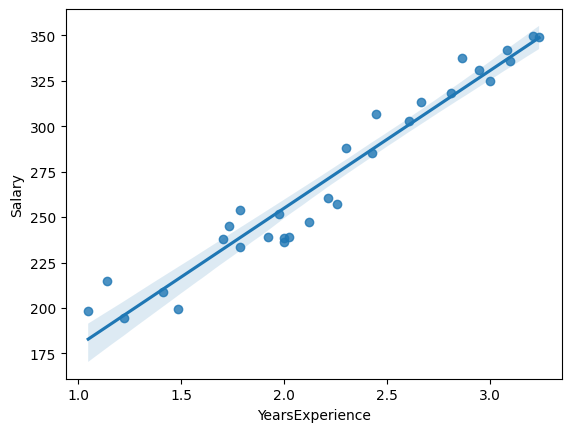

In [24]:
sns.regplot(x = "YearsExperience", y = "Salary" , data=data);

# model testing

In [25]:
# coefficient parameters
model.params

Intercept          103.568031
YearsExperience     75.626932
dtype: float64

In [26]:
# Rsquared and adjusted_Rsquared values
model.rsquared,model.rsquared_adj

(0.9419490138976825, 0.9398757643940283)

# model predictions

In [27]:
#Predict for 4 and 8 years experiance
newdata=pd.Series([4,8])

In [28]:
data_pred=pd.DataFrame(newdata,columns=["YearsExperience"])

In [29]:
data_pred

,YearsExperience
0,4
1,8


In [30]:
model.predict(data_pred)

0    406.075758
1    708.583486
dtype: float64